In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

students_data = pd.read_csv('cleaned_students_dataset.csv')
course_activity_data = pd.read_csv('cleaned_course_activity.csv')
feedback_data = pd.read_csv('cleaned_feedback.csv')

<ipython-input-4-d731f6f44e82>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_by_course_age = engagement_data.groupby(['Course_ID', 'Age_Group'])['Time_Spent_Minutes'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

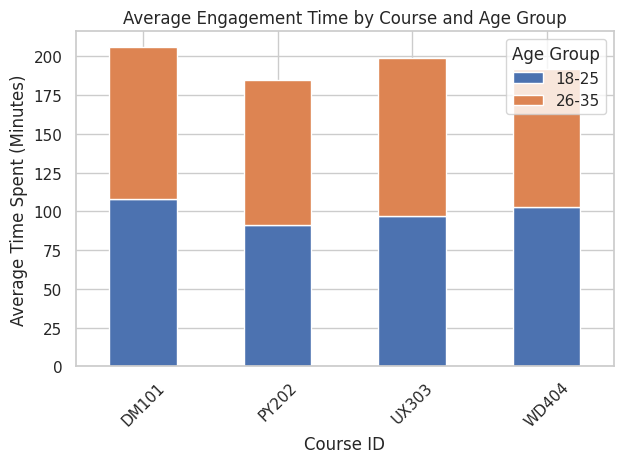

In [4]:
#Engagement Patterns by Course and Age Group
students_data = students_data[students_data['Age'] >= 18]
students_data['Age_Group'] = pd.cut(
    students_data['Age'],
    bins=[18, 25, 35, 45, 55, 65, 100],
    labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
)

engagement_data = course_activity_data.merge(students_data[['Student_ID', 'Age_Group']], on='Student_ID')
engagement_by_course_age = engagement_data.groupby(['Course_ID', 'Age_Group'])['Time_Spent_Minutes'].mean().unstack()
engagement_by_course_age = engagement_by_course_age.dropna(axis=1, how='all')

plt.figure(figsize=(12, 6))
engagement_by_course_age.plot(kind='bar', stacked=True)
plt.title('Average Engagement Time by Course and Age Group')
plt.xlabel('Course ID')
plt.ylabel('Average Time Spent (Minutes)')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-3-2d23a324c13e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_feedback_rating.index, y=average_feedback_rating.values, palette='viridis')


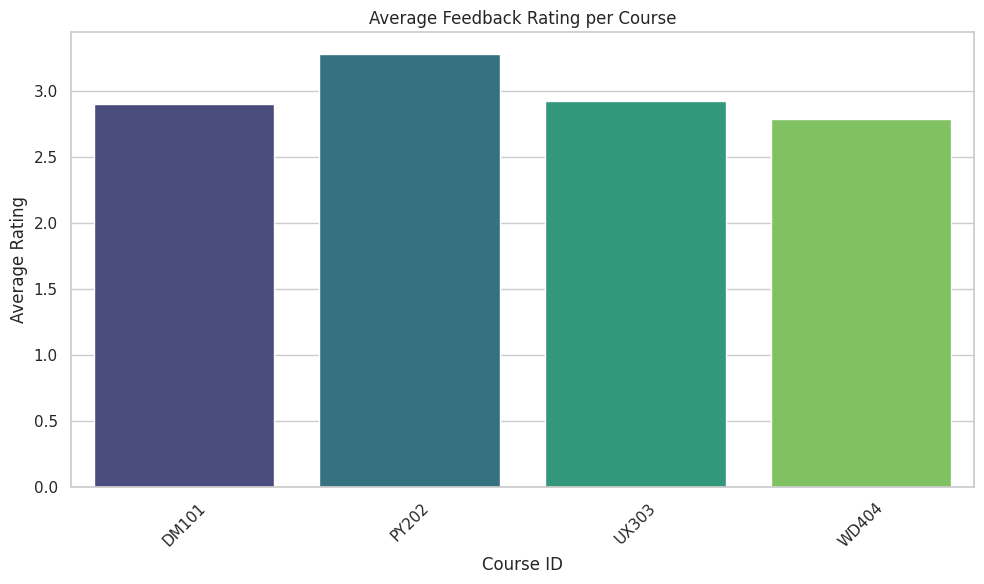

In [ ]:
#Compare Feedback Ratings by Course
average_feedback_rating = feedback_data.groupby('Course_ID')['Rating'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_feedback_rating.index, y=average_feedback_rating.values, palette='viridis')
plt.title('Average Feedback Rating per Course')
plt.xlabel('Course ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-7-8d56d250d891>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  feedback_pivot = feedback_heatmap_data.pivot_table(values='Rating', index='Course_ID', columns='Age_Group', aggfunc='mean')


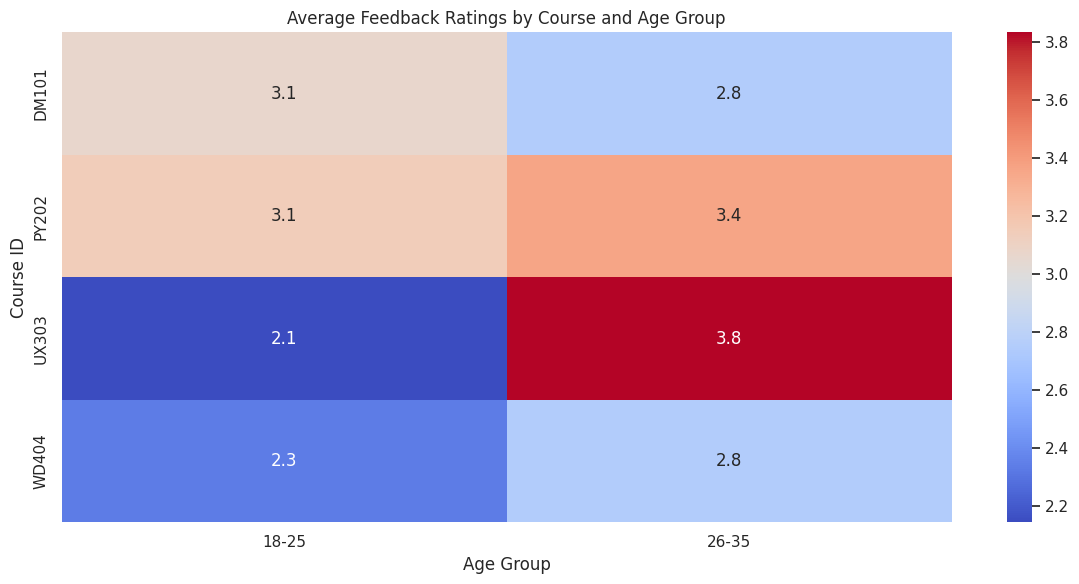

In [7]:
#Heatmap of Feedback Ratings by Course and Age Group
feedback_heatmap_data = feedback_data.merge(students_data[['Student_ID', 'Age_Group']], on='Student_ID')
feedback_pivot = feedback_heatmap_data.pivot_table(values='Rating', index='Course_ID', columns='Age_Group', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(feedback_pivot, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Average Feedback Ratings by Course and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Course ID')
plt.tight_layout()
plt.show()

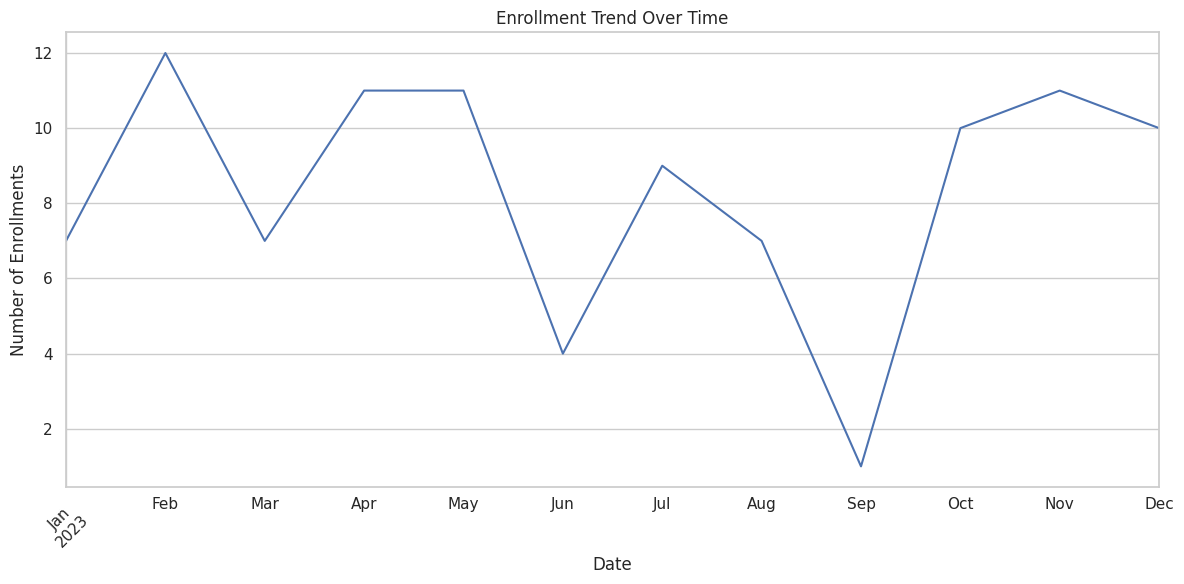

In [ ]:
#Trend Over Time
students_data['Enrolment_Date'] = pd.to_datetime(students_data['Enrolment_Date'])
enrollment_trend = students_data['Enrolment_Date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
enrollment_trend.plot(kind='line')
plt.title('Enrollment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

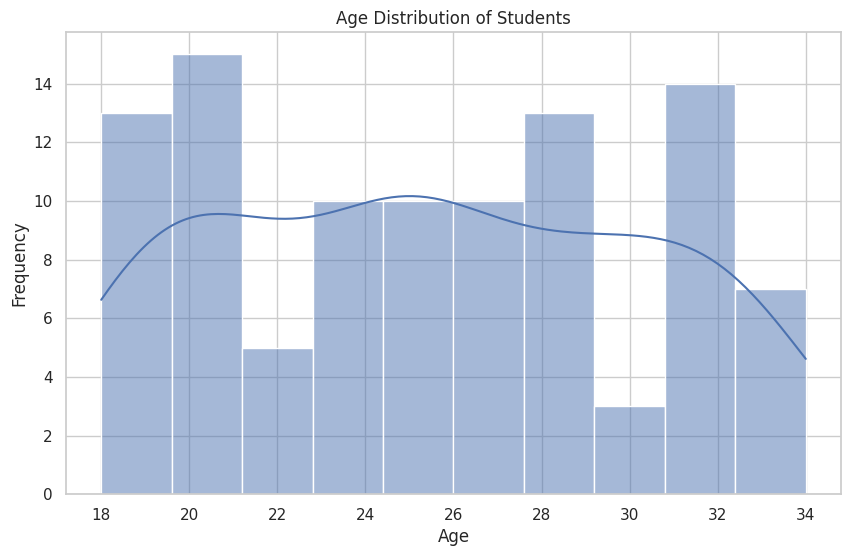

In [ ]:
  # Visualize Age Distribution
  plt.figure(figsize=(10, 6))
  sns.histplot(students_data['Age'], bins=10, kde=True)
  plt.title('Age Distribution of Students')
  plt.xlabel('Age')
  plt.ylabel('Frequency')
  plt.show()

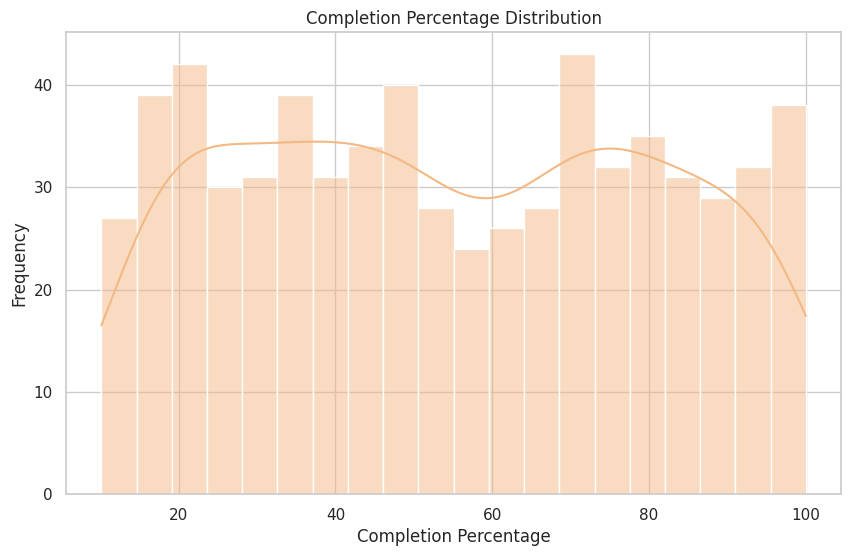

In [ ]:
# Visualize Completion Percentage
plt.figure(figsize=(10, 6))
sns.histplot(course_activity_data['Completion_Percentage'], bins=20, kde=True, color = '#f3b884')
plt.title('Completion Percentage Distribution')
plt.xlabel('Completion Percentage')
plt.ylabel('Frequency')
plt.show()

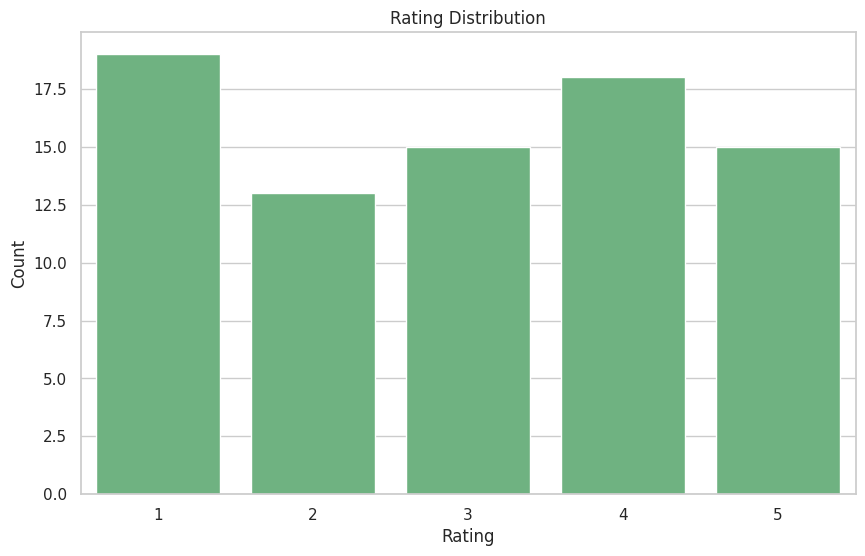

In [ ]:
# Visualize Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=feedback_data, x='Rating', color = '#64bd7c')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()